In [ ]:
# Combine all datasets into one hot one. This will include columns from articles.csv (25 columns), customers.csv(7 columns) and transaction_train.csv (5 columns). Total columns in the final dataset will be 25 + 7 + 5 - 2 = 35 columns.
# The idea is to apply PCA on the combined dataset and identify useful features.
# EDA (HeatMap + Visualization)
# Cluster on this dataset to find similar customers and similar articles.
# Experiment - We can cluster similar customers on customers.csv only and similar articles on articles.csv.
#
# One implemented Data Processing Method -  PCA and/or SVD.
# Two ML model implemented - Kmeans + DBSCAN
#
#
#

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

**Read Data**

In [ ]:
# [Previous Setting]
## articles = pd.read_csv("/content/drive/MyDrive/CS 7641 Machine Learning Group Project/articles.csv")
## customers = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/customers.csv')
## transactions = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_train.csv')


# 110624_Lin:[Revised Setting]Right_click shared dir "CS 7641 Machine Learning Group Project", add shortcut to perosonal drive.
path = '/content/drive/MyDrive/CS 7641 Machine Learning Group Project'
articles = pd.read_csv(path + "/" + "articles.csv")
customers = pd.read_csv(path + "/" + "customers.csv")
transactions = pd.read_csv(path + "/" + "transactions_train.csv")

In [ ]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [ ]:
customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [ ]:
transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [ ]:
articles_Dict = pd.DataFrame({'Unique_Cnt': articles.nunique(),
                'Null_Count': articles.isnull().sum()})
print(articles_Dict)

                              Unique_Cnt  Null_Count
article_id                        105542           0
product_code                       47224           0
prod_name                          45875           0
product_type_no                      132           0
product_type_name                    131           0
product_group_name                    19           0
graphical_appearance_no               30           0
graphical_appearance_name             30           0
colour_group_code                     50           0
colour_group_name                     50           0
perceived_colour_value_id              8           0
perceived_colour_value_name            8           0
perceived_colour_master_id            20           0
perceived_colour_master_name          20           0
department_no                        299           0
department_name                      250           0
index_code                            10           0
index_name                            10      

In [ ]:
customer_Dict = pd.DataFrame({'Unique_Cnt': customers.nunique(),
                'Null_Count': customers.isnull().sum()})
print(customer_Dict)

                        Unique_Cnt  Null_Count
customer_id                1371980           0
FN                               1      895050
Active                           1      907576
club_member_status               3        6062
fashion_news_frequency           3       16011
age                             84       15861
postal_code                 352899           0


In [ ]:
trans_Dict = pd.DataFrame({'Unique_Cnt': transactions.nunique(),
                'Null_Count': transactions.isnull().sum()})
print(trans_Dict)

                  Unique_Cnt  Null_Count
Unnamed: 0.1        24465627           0
Unnamed: 0          24465627           0
t_dat                    558           0
customer_id          1174730           0
article_id             89356           0
price                   9533           0
sales_channel_id           2           0


We observe that features for which we expect to have the same number of unique value, like product_type_no and product_type_name, departmant_no and department_name, section_no and section_name have different number of unique values, which might means that we might have categories with same name.

Others, like: index_code and index_name, garment_group_no and garment_group_name have the same number of unique values.

We also observe that none of the required values are none

<ipython-input-12-fd1cf7ff2664>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


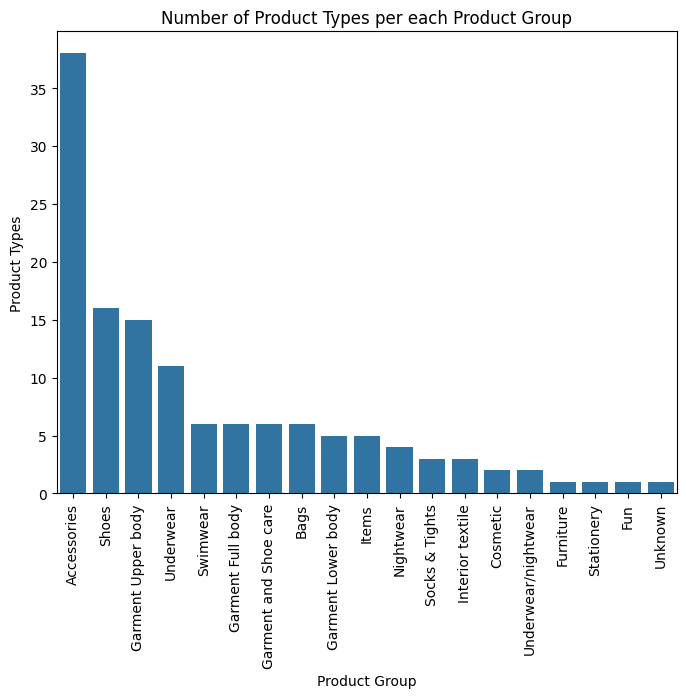

In [ ]:
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

<ipython-input-13-348583612326>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


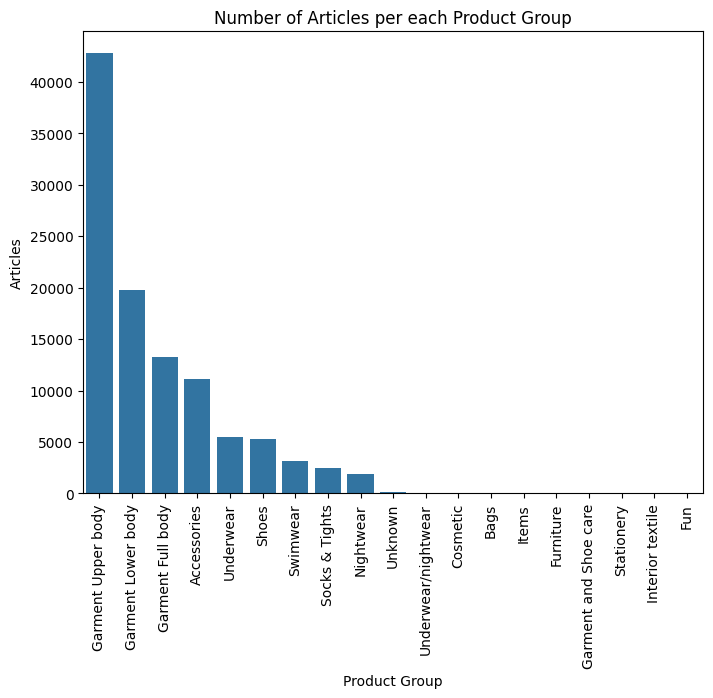

In [ ]:
temp = articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

<ipython-input-14-1b65675e5389>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


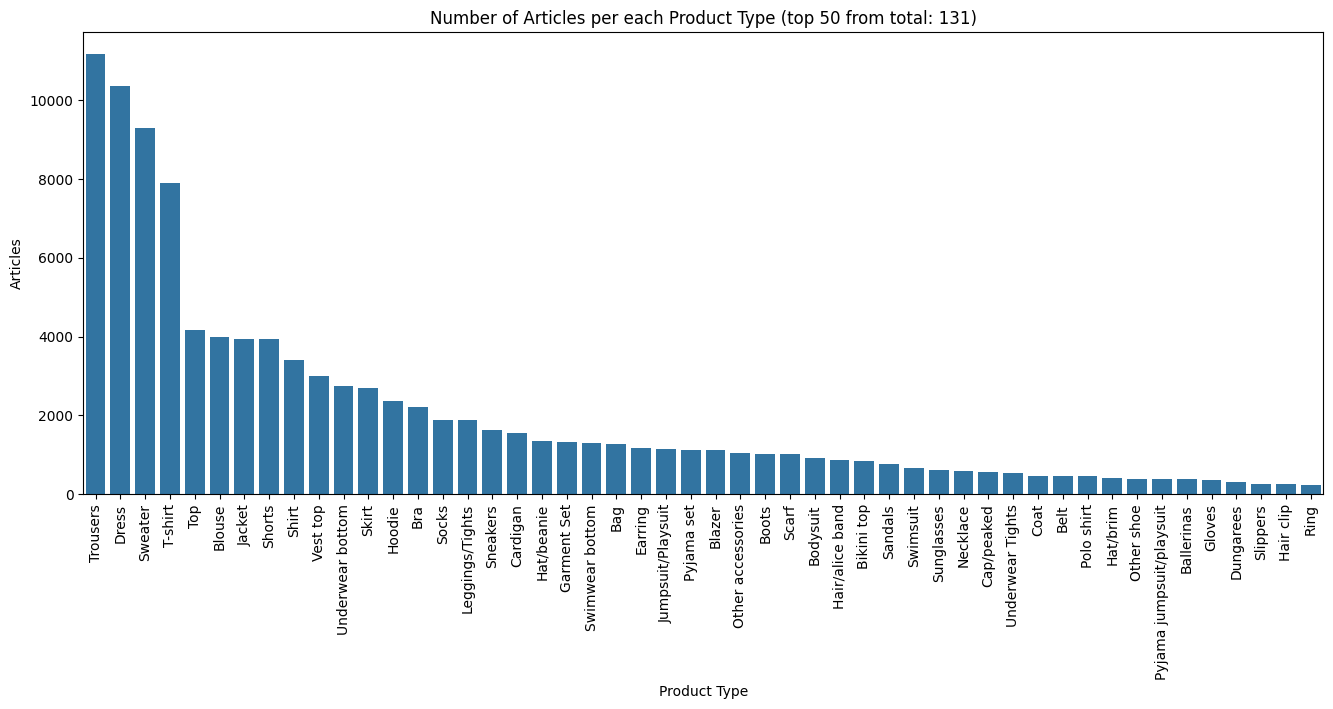

In [ ]:
temp = articles.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

<ipython-input-15-51a4b029d163>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


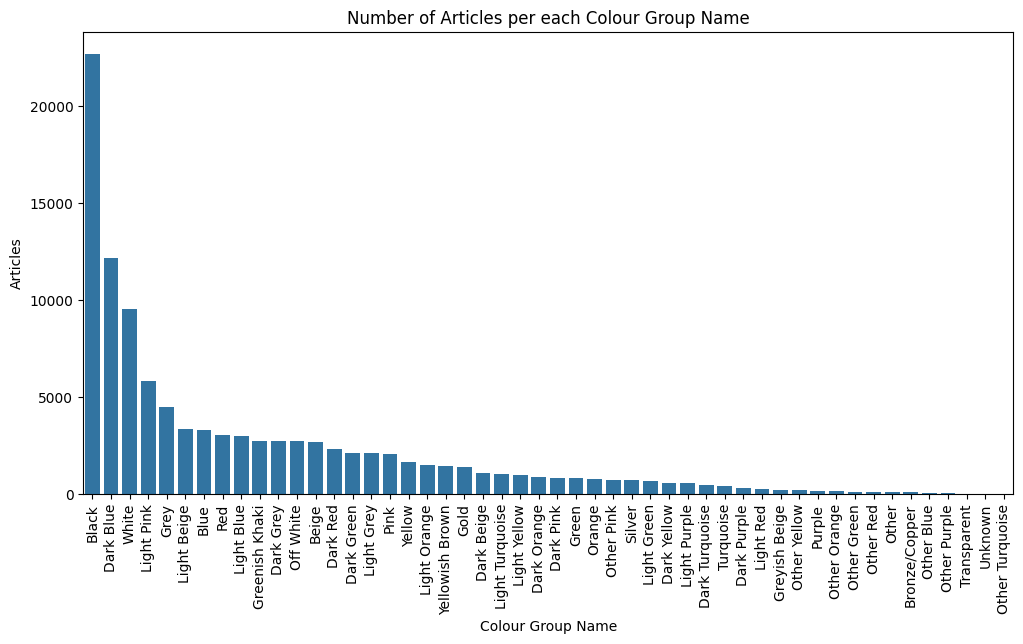

In [ ]:
temp = articles.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

<ipython-input-16-74de147334dd>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


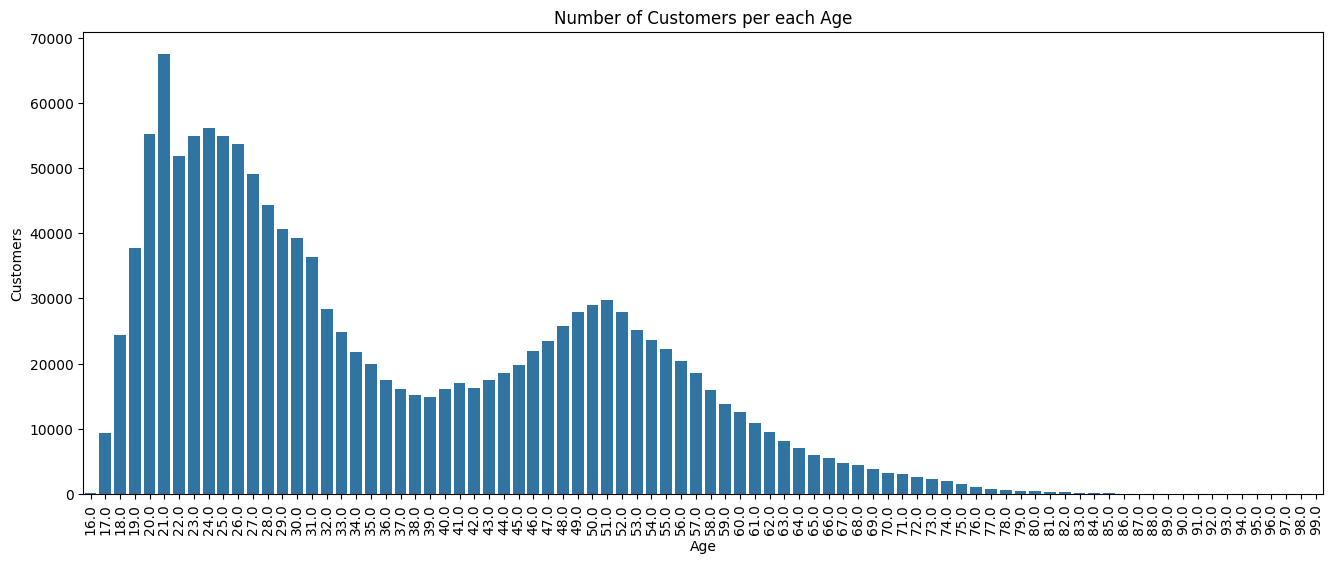

In [ ]:
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

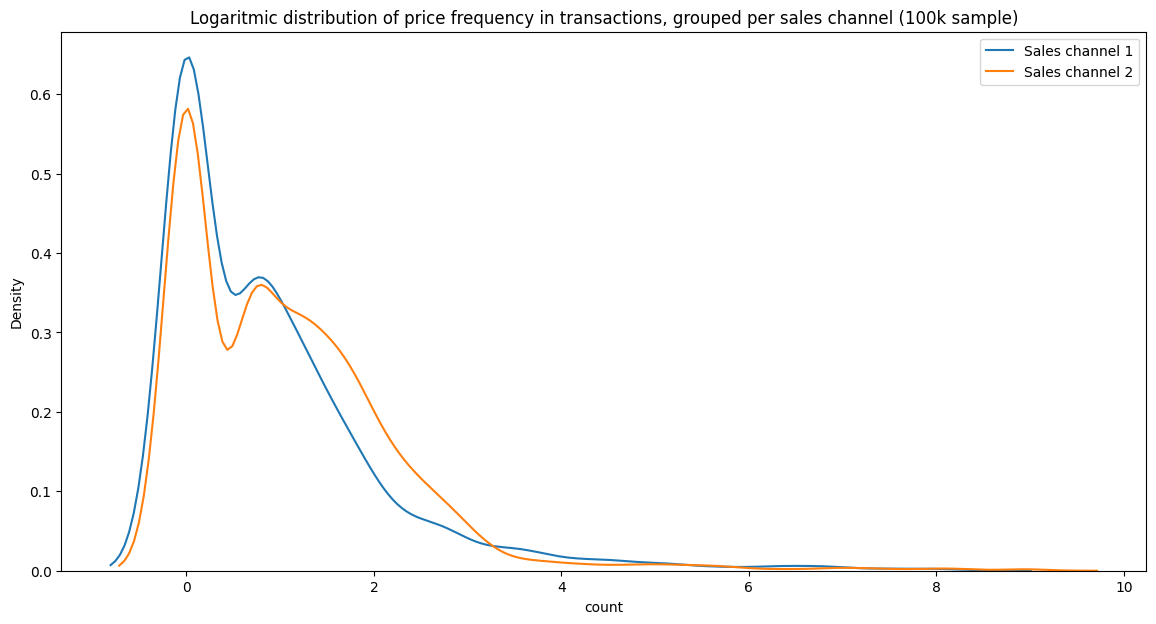

In [ ]:
df = transactions.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))

# 110624_Lin[channel 1, channel 1 --(modify)-->channel 1, channel 2]
ax.legend(labels=['Sales channel 1', 'Sales channel 2'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

<Axes: xlabel='t_dat'>

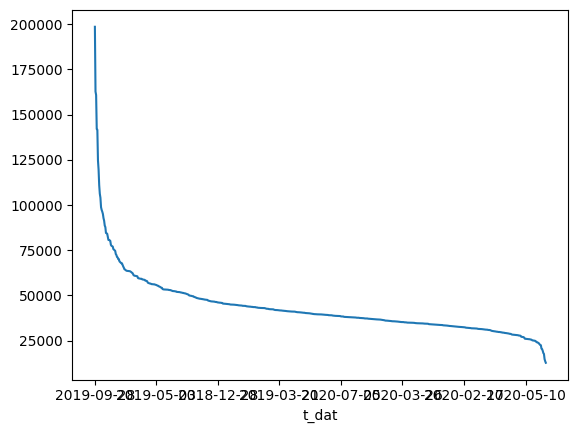

In [ ]:
transactions['t_dat'].value_counts().plot()

We will only use the most recent transactions, so there is no need to read in the whole file everytime and biases introduced by old samples will be eleminated

In [ ]:
print(transactions.t_dat.min())
print(transactions.t_dat.max())

2018-09-20
2020-09-22


In [ ]:
transactions.t_dat = pd.to_datetime(transactions.t_dat)
transactions = transactions.loc[transactions.t_dat >= '2019-03-01',:]

In [ ]:
# How many items do customers typically buy?
transactions.customer_id.value_counts()

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1557
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1200
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1094
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1027
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6     989
                                                                    ... 
2d5e114f86de522c98cc0f787e80fba48e9d062832d1928610d38b150c9a9d4a       1
4b1512fcaf2076ed3e256342849dec8816cbc83647bc1ffba591cdc0d1a68d9f       1
4b2ee9d0e8fe7eafc9be2f316edf209bc72fea7067e9b642e7695aee817d0077       1
4b7355f3e79eaf7dcae4f54e2efaa7a5515879575af190693311009f38cb5121       1
4b7a77592c68653f90e2c4f63dd0f16b01a7ab4af187d47867163640e80454b6       1
Name: count, Length: 1174730, dtype: int64

Removing NULL values in customers

In [ ]:
customers["club_member_status"] = customers["club_member_status"].fillna('INACTIVE')
customers["club_member_status"] = customers["club_member_status"].replace(["PRE-CREATE"], "INACTIVE")
customers["club_member_status"] = customers["club_member_status"].replace(["LEFT CLUB"], "INACTIVE")

In [ ]:
customers["fashion_news_frequency"] = customers["fashion_news_frequency"].fillna('NONE')
customers["fashion_news_frequency"] = customers["fashion_news_frequency"].replace(["None"], "NONE")
customers["fashion_news_frequency"] = customers["fashion_news_frequency"].replace(["Regularly"], "REGULARLY")

In [ ]:
customers["FN"] = customers["FN"].fillna(0)
customers["FN"] = customers["FN"].astype(int)

In [ ]:
customers["Active"] = customers["Active"].fillna(0)
customers["Active"] = customers["Active"].astype(int)

In [ ]:
customers["age"] = customers["age"].fillna(customers["age"].median())

In [ ]:
customers = pd.get_dummies(customers, columns=["club_member_status"])
customers.drop(["postal_code"], axis=1, inplace=True)
customers.head()

customer_id  FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   0       0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   0       0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   0       0   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   0       0   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   1       1   

  fashion_news_frequency   age  club_member_status_ACTIVE  \
0                   NONE  49.0                       True   
1                   NONE  25.0                       True   
2                   NONE  24.0                       True   
3                   NONE  54.0                       True   
4              REGULARLY  52.0                       True   

   club_member_status_INACTIVE  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False

In [ ]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('NONE', 0)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('Monthly', 1)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('REGULARLY', 2)

<ipython-input-12-da8f695b183d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('REGULARLY', 2)


In [ ]:
ohe_columns = []
total = 0

for col in articles.columns:
    if articles[col].dtype == "int64" and len(articles[col].unique()) <= 500:
        ohe_columns.append(col)
        total += len(articles[col].unique())

    print(col, articles[col].dtype, len(articles[col].unique()))


print("Columns to use:", ohe_columns)

article_id int64 105542
product_code int64 47224
prod_name object 45875
product_type_no int64 132
product_type_name object 131
product_group_name object 19
graphical_appearance_no int64 30
graphical_appearance_name object 30
colour_group_code int64 50
colour_group_name object 50
perceived_colour_value_id int64 8
perceived_colour_value_name object 8
perceived_colour_master_id int64 20
perceived_colour_master_name object 20
department_no int64 299
department_name object 250
index_code object 10
index_name object 10
index_group_no int64 5
index_group_name object 5
section_no int64 57
section_name object 56
garment_group_no int64 21
garment_group_name object 21
detail_desc object 43405
Columns to use: ['product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_group_no', 'section_no', 'garment_group_no']


In [ ]:
V = pd.get_dummies(articles[ohe_columns], columns=ohe_columns).values
V.shape

(105542, 622)

In [ ]:
articles.drop('prod_name', axis=1, inplace=True)

In [ ]:
articles.drop('product_type_name', axis=1, inplace=True)
articles.drop('graphical_appearance_name', axis=1, inplace=True)
articles.drop('colour_group_name', axis=1, inplace=True)
articles.drop('perceived_colour_value_name', axis=1, inplace=True)
articles.drop('perceived_colour_master_name', axis=1, inplace=True)
articles.drop('department_name', axis=1, inplace=True)
articles.drop('index_name', axis=1, inplace=True)
articles.drop('index_group_name', axis=1, inplace=True)
articles.drop('section_name', axis=1, inplace=True)
articles.drop('garment_group_name', axis=1, inplace=True)

Doing one hot encoding on articles is giving 622 dimensions which is unrealastic so, let's stick to ordinal encoding.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
ohe_columns = ['product_code', 'product_type_no', 'product_group_name',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_master_id',
       'department_no', 'index_code', 'index_group_no', 'section_no',
       'garment_group_no']
articles[ohe_columns] = encoder.fit_transform(articles[ohe_columns])

articles.head()

article_id  product_code  product_type_no  product_group_name  \
0   108775015           0.0             48.0                 7.0   
1   108775044           0.0             48.0                 7.0   
2   108775051           0.0             48.0                 7.0   
3   110065001           1.0             90.0                16.0   
4   110065002           1.0             90.0                16.0   

   graphical_appearance_no  colour_group_code  perceived_colour_value_id  \
0                     16.0                9.0                        4.0   
1                     16.0               10.0                        3.0   
2                     17.0               11.0                        1.0   
3                     16.0                9.0                        4.0   
4                     16.0               10.0                        3.0   

   perceived_colour_master_id  department_no  index_code  index_group_no  \
0                         5.0           47.0         0.0             0.0   
1                         9.0           47.0         0.0             0.0   
2                         9.0           47.0         0.0             0.0   
3                         5.0           12.0         1.0             0.0   
4                         9.0           12.0         1.0             0.0   

   section_no  garment_group_no  \
0         8.0               1.0   
1         8.0               1.0   
2         8.0               1.0   
3        43.0              14.0   
4        43.0              14.0   

                                         detail_desc  
0            Jersey top with narrow shoulder straps.  
1            Jersey top with narrow shoulder straps.  
2            Jersey top with narrow shoulder straps.  
3  Microfibre T-shirt bra with underwired, moulde...  
4  Microfibre T-shirt bra with underwired, moulde...

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word.lower() not in stopwords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords=set(stopwords.words('english'))
nltk.download('wordnet')

articles["detail_desc"] = articles["detail_desc"].fillna("nodesc")

desc = articles.detail_desc.str.lower()
desc_clean = remove_stopwords(desc)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.corpus import wordnet
# nltk.download('punkt')
ntlk.download('all')
lemmatizer = WordNetLemmatizer()
# Lemmatize words in each sentence
lemmatized_sentences = []
for sentence in desc_clean:
    # Tokenize the sentence
    words = nltk.word_tokenize(sentence)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in words]
    # Reassemble the sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    lemmatized_sentences.append(lemmatized_sentence)

desc_clean = lemmatized_sentences

In [ ]:
tfidf = TfidfVectorizer(
        max_features=50,  # Limit features to top 50 terms
        min_df=2,          # Ignore terms that appear in less than 2 documents
        max_df=0.95,       # Ignore terms that appear in more than 95% of documents
        stop_words='english'
    )
X_train_tfidf = tfidf.fit_transform(desc_clean)

['adjustable' 'blend' 'button' 'buttons' 'cm' 'collar' 'concealed'
 'cotton' 'cuffs' 'drawstring' 'dress' 'elasticated' 'elastication'
 'fabric' 'fit' 'fly' 'hem' 'hems' 'jersey' 'knit' 'legs' 'length' 'lined'
 'long' 'narrow' 'neck' 'neckline' 'pocket' 'pockets' 'press' 'ribbed'
 'ribbing' 'rounded' 'seam' 'shirt' 'short' 'shorts' 'shoulder'
 'shoulders' 'sides' 'sleeved' 'sleeves' 'soft' 'straps' 'sweatshirt'
 'unlined' 'waist' 'weave' 'wide' 'zip']


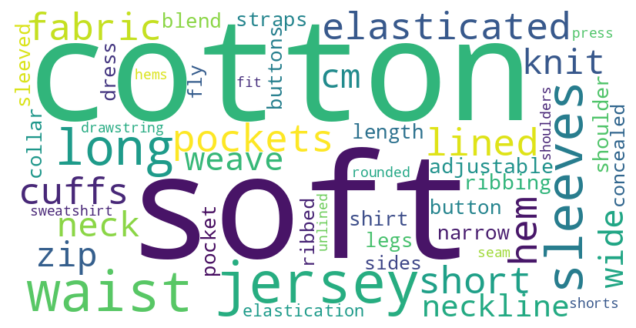

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import io
import base64
text_column='description'
max_words=100
width=800
height=400
background_color='white'
feature_names = tfidf.get_feature_names_out()
print(feature_names)
avg_tfidf_scores = np.array(X_train_tfidf.mean(axis=0)).flatten()
word_freq = dict(zip(feature_names, avg_tfidf_scores))
wordcloud = WordCloud(width=width,height=height,background_color=background_color,max_words=max_words,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)
plt.figure(figsize=(width/100, height/100), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
buffer = io.BytesIO()
plt.savefig(buffer, format='png', bbox_inches='tight', pad_inches=0)
buffer.seek(0)
image_base64 = base64.b64encode(buffer.getvalue()).decode()
plt.show()
plt.close()

In [ ]:
articles.shape
X_train_tfidf.shape

(105542, 50)

In [ ]:
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head()

adjustable  blend  button  buttons   cm  collar  concealed  cotton  cuffs  \
0    0.000000    0.0     0.0      0.0  0.0     0.0        0.0     0.0    0.0   
1    0.000000    0.0     0.0      0.0  0.0     0.0        0.0     0.0    0.0   
2    0.000000    0.0     0.0      0.0  0.0     0.0        0.0     0.0    0.0   
3    0.344891    0.0     0.0      0.0  0.0     0.0        0.0     0.0    0.0   
4    0.344891    0.0     0.0      0.0  0.0     0.0        0.0     0.0    0.0   

   drawstring  ...  sleeved  sleeves  soft    straps  sweatshirt  unlined  \
0         0.0  ...      0.0      0.0   0.0  0.557779         0.0      0.0   
1         0.0  ...      0.0      0.0   0.0  0.557779         0.0      0.0   
2         0.0  ...      0.0      0.0   0.0  0.557779         0.0      0.0   
3         0.0  ...      0.0      0.0   0.0  0.369796         0.0      0.0   
4         0.0  ...      0.0      0.0   0.0  0.369796         0.0      0.0   

   waist  weave  wide  zip  
0    0.0    0.0   0.0  0.0  
1    0.0    0.0   0.0  0.0  
2    0.0    0.0   0.0  0.0  
3    0.0    0.0   0.0  0.0  
4    0.0    0.0   0.0  0.0  

[5 rows x 50 columns]

In [ ]:
articles = pd.concat([articles, tfidf_df], axis=1)
articles.drop('detail_desc', axis=1, inplace=True)
articles.head()

article_id  product_code  product_type_no  product_group_name  \
0   108775015           0.0             48.0                 7.0   
1   108775044           0.0             48.0                 7.0   
2   108775051           0.0             48.0                 7.0   
3   110065001           1.0             90.0                16.0   
4   110065002           1.0             90.0                16.0   

   graphical_appearance_no  colour_group_code  perceived_colour_value_id  \
0                     16.0                9.0                        4.0   
1                     16.0               10.0                        3.0   
2                     17.0               11.0                        1.0   
3                     16.0                9.0                        4.0   
4                     16.0               10.0                        3.0   

   perceived_colour_master_id  department_no  index_code  ...  sleeved  \
0                         5.0           47.0         0.0  ...      0.0   
1                         9.0           47.0         0.0  ...      0.0   
2                         9.0           47.0         0.0  ...      0.0   
3                         5.0           12.0         1.0  ...      0.0   
4                         9.0           12.0         1.0  ...      0.0   

   sleeves  soft    straps  sweatshirt  unlined  waist  weave  wide  zip  
0      0.0   0.0  0.557779         0.0      0.0    0.0    0.0   0.0  0.0  
1      0.0   0.0  0.557779         0.0      0.0    0.0    0.0   0.0  0.0  
2      0.0   0.0  0.557779         0.0      0.0    0.0    0.0   0.0  0.0  
3      0.0   0.0  0.369796         0.0      0.0    0.0    0.0   0.0  0.0  
4      0.0   0.0  0.369796         0.0      0.0    0.0    0.0   0.0  0.0  

[5 rows x 63 columns]

In [ ]:
# articles.to_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/articles_cleaned.csv', index=0)
# customers.to_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/customers_cleaned.csv', index=0)
# transactions.to_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_cleaned.csv')

In [ ]:
import pandas as pd
articles = pd.read_csv("/content/drive/MyDrive/CS 7641 Machine Learning Group Project/articles_cleaned.csv")
customers = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/customers_cleaned.csv')
transactions = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_cleaned.csv')

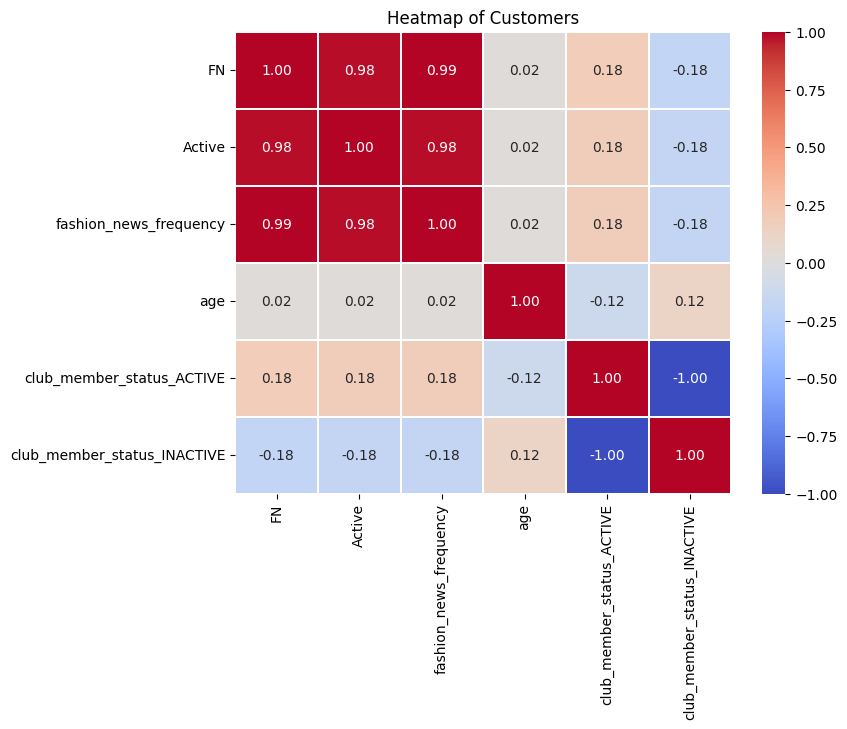

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
csn = customers.drop('customer_id', axis=1)
csn = csn.apply(pd.to_numeric, errors='coerce')
csn = csn.fillna(0)
csn = csn.astype({col: 'int64' for col in csn.select_dtypes('bool').columns})
csn = csn.sample(n=1000, random_state=42)
sns.heatmap(csn.corr(method = 'spearman'),
                 cmap = 'coolwarm', annot = True, fmt = '.2f',
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)
plt.title("Heatmap of Customers")
plt.show()

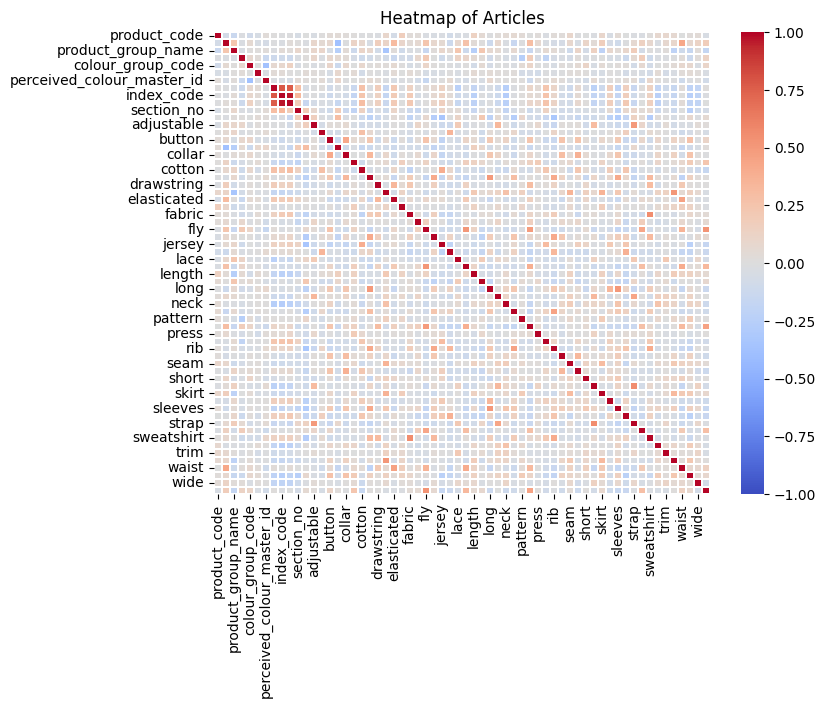

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
csn = articles.drop('article_id', axis=1)
csn = csn.apply(pd.to_numeric, errors='coerce')
csn = csn.fillna(0)
csn = csn.astype({col: 'int64' for col in csn.select_dtypes('bool').columns})
csn = csn.sample(n=1000, random_state=42)
sns.heatmap(csn.corr(method = 'spearman'),
                 cmap = 'coolwarm', annot = False, fmt = '.2f',
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)
plt.title("Heatmap of Articles")
plt.show()

# Dimensionality Reduction with PCA on Articles Dataset
In this section, we will apply PCA to the articles data. We want to reduce the dimensionality of the dataset, retaining only features that explain the majority of the variance.

## Standardization
For PCA to work, we need data that is numerical and standardized with the mean as 0. We did one-hot encoding above to ensure we have numerical data. Now, it's necessary to standardize. We want to scale all numerical features to have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

articles_for_pca = articles.drop(columns=['article_id'])
scaler = StandardScaler()
articles_scaled = scaler.fit_transform(articles_for_pca)


## Apply PCA
Now, run PCA to reduce the dimensionality. Here, we can specify n_components=0.95 to retain 95% of the variance, or choose a specific number of components.

Explained variance ratio by principal components: [0.07185674 0.06575133 0.05225033 0.04092822 0.03769871 0.03603509
 0.03262064 0.02789429 0.02707289 0.02351926 0.02212258 0.02031175
 0.01992589 0.0192833  0.01817757 0.01796746 0.01752682 0.01682533
 0.01641708 0.01632531 0.01617404 0.01593907 0.01525024 0.01468253
 0.01458066 0.01396879 0.01383816 0.01361957 0.01312454 0.01272966
 0.01252872 0.01224672 0.01202074 0.01193902 0.01158908 0.01135945
 0.01128021 0.01081791 0.01068874 0.01014072 0.00992306 0.00948936
 0.00926189 0.00921625 0.00888336 0.00851655 0.00816371 0.00773752
 0.00752401 0.00720152 0.00671008]


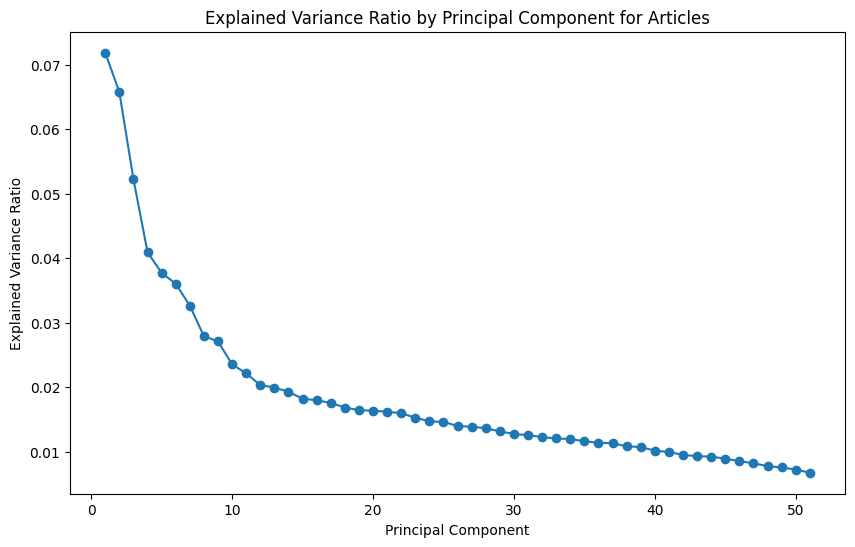

In [ ]:
# Apply PCA to capture 95% of the variance
pca = PCA(n_components=0.95)
articles_pca = pca.fit_transform(articles_scaled)

# Convert the result back to a DataFrame for easy interpretation
articles_pca_df = pd.DataFrame(articles_pca, columns=[f'PC{i+1}' for i in range(articles_pca.shape[1])])

# Print explained variance ratio for each principal component
print("Explained variance ratio by principal components:", pca.explained_variance_ratio_)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component for Articles")
plt.show()

## PCA for Customers

Explained variance ratio by principal components: [0.5195622  0.31089028 0.16409752]


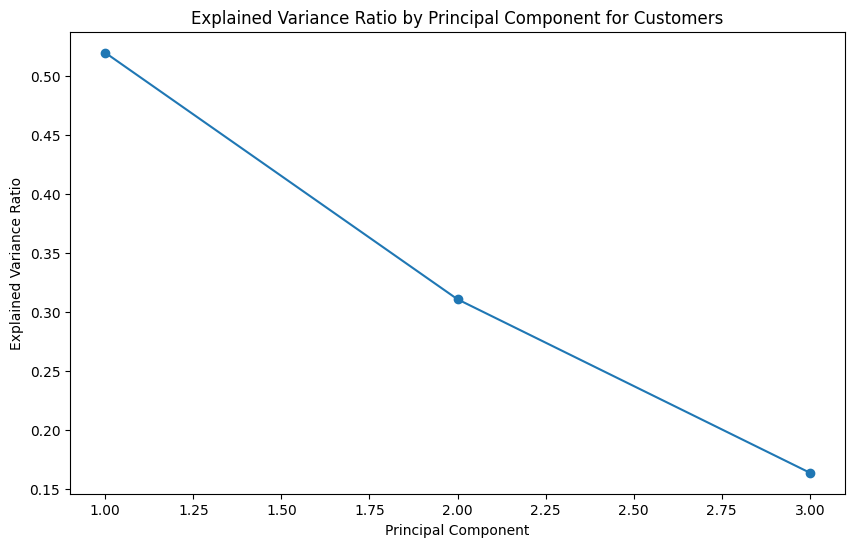

In [ ]:
customers_for_pca = customers.drop(columns=['customer_id'])


scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers_for_pca)

# Apply PCA to capture 95% of the variance
pca = PCA(n_components=0.95)
customers_pca = pca.fit_transform(customers_scaled)

# Convert the result back to a DataFrame for easy interpretation
customers_pca_df = pd.DataFrame(customers_pca, columns=[f'PC{i+1}' for i in range(customers_pca.shape[1])])

# Print explained variance ratio for each principal component
print("Explained variance ratio by principal components:", pca.explained_variance_ratio_)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component for Customers")
plt.show()


## PCA for Transactions

In [ ]:
# transactions_for_pca.head(2)
# 110624_Lin:[Add feat.] month, season, fashion_season
def get_season(month):
    if month in [3, 4, 5]:
        return 1 #'Spring'
    elif month in [6, 7, 8]:
        return 2 #'Summer'
    elif month in [9, 10, 11]:
        return 3 #'Fall'
    else:
        return 4 #'Winter'
def get_fashion_season(month):
    if month in [1, 2]:
        return 1 #'Spring/Summer'
    elif month in [5, 6]:
        return 2 #'Pre-Fall'
    elif month in [7, 8]:
        return 3 #'Autumn/Winter'
    elif month in [10, 11]:
        return 4 #'Resort/Cruise'
    else:
        return 5 #'Other'

transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

transactions['month'] = transactions['t_dat'].dt.month
transactions['season'] = transactions['month'].apply(get_season)
transactions['fashion_season'] = transactions['month'].apply(get_fashion_season)

transactions.head(2)

Unnamed: 0.1  Unnamed: 0      t_dat  \
0             0     6827145 2019-03-01   
1             1     6827146 2019-03-01   

                                         customer_id  article_id     price  \
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   578020002  0.013542   
1  0002db27a1651998a3de4463437b580b45dfa7d8107afa...   751655001  0.050831   

   sales_channel_id  month  season  fashion_season  
0                 2      3       1               5  
1                 1      3       1               5

Explained variance ratio by principal components: [0.25402166 0.2204004  0.18873668 0.14160754 0.12574212 0.0694916 ]


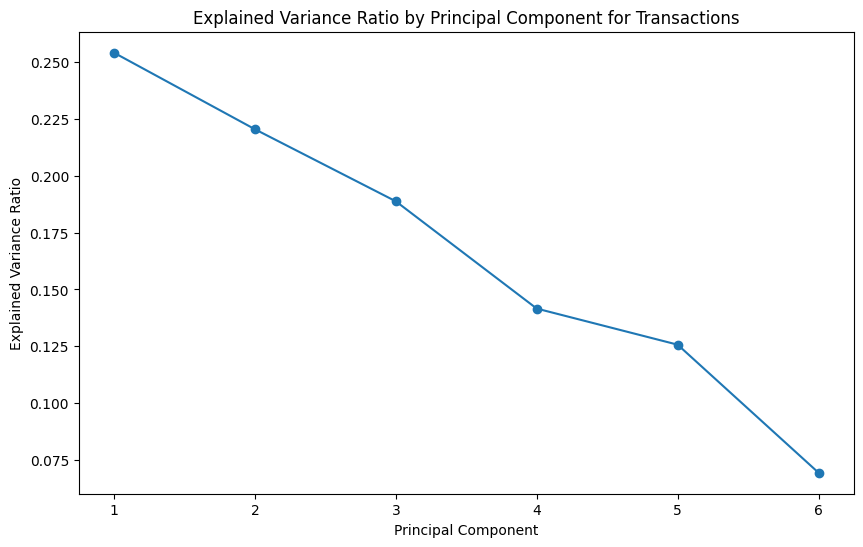

In [ ]:
# transactions.head()
# 110624_Lin:[Change] add drop_col:'t_dat'
transactions_for_pca = transactions.drop(columns=['t_dat', 'customer_id', 'article_id'])
scaler = StandardScaler()
transactions_scaled = scaler.fit_transform(transactions_for_pca)

# Apply PCA to capture 95% of the variance
pca = PCA(n_components=0.95)
transactions_pca = pca.fit_transform(transactions_scaled)

# Convert the result back to a DataFrame for easy interpretation
transactions_pca_df = pd.DataFrame(transactions_pca, columns=[f'PC{i+1}' for i in range(transactions_pca.shape[1])])

# Print explained variance ratio for each principal component
print("Explained variance ratio by principal components:", pca.explained_variance_ratio_)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component for Transactions")
plt.show()

## KMeans - Articles

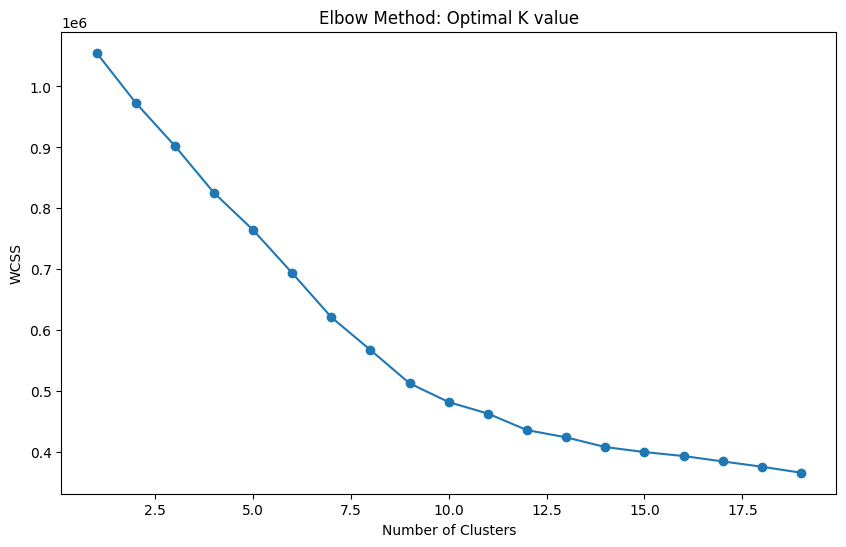

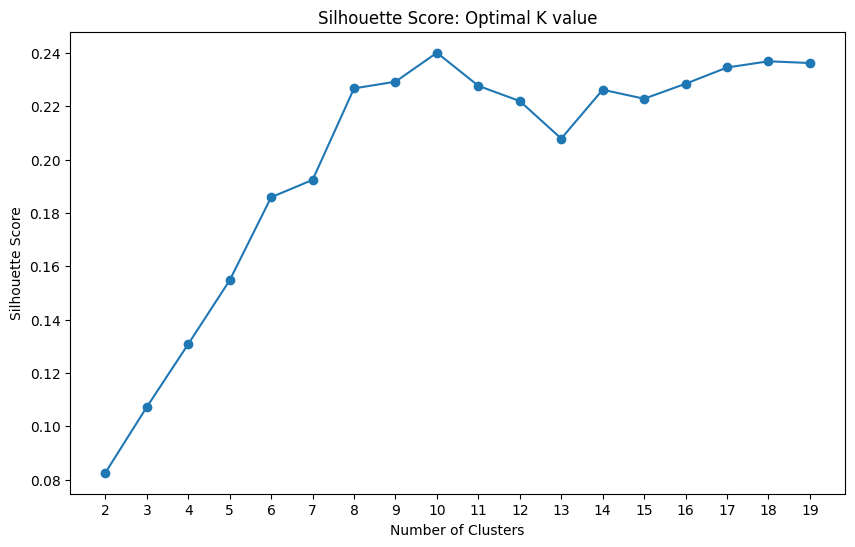

Optimal K(Elbow & Silhouette): 10


In [ ]:
# 110624_Lin:[Add] KMeans Clustering: I choose PC10 to conduct KMeans according to the previous elbow plot.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

articles_kmeans_df = articles_pca_df.iloc[:, :10]

# [***]Standardize the PCA-transformed data
scaler = StandardScaler()
articles_kmeans_df_scaled = scaler.fit_transform(articles_kmeans_df)
articles_kmeans_df_scaled = pd.DataFrame(articles_kmeans_df_scaled, columns=articles_kmeans_df.columns)

# [Elbow method] to determine K value
lim_k_test = 20
wcss = []
for i in range(1, lim_k_test):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(articles_kmeans_df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, lim_k_test), wcss, marker='o')
plt.title('Elbow Method: Optimal K value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# [Silhouette method] to determine K value
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

sample_size = 10000
sampled_data = articles_kmeans_df_scaled.sample(n=sample_size, random_state=42)

sil_scores = []
range_n_clusters = range(2, lim_k_test)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_data)
    silhouette_avg = silhouette_score(sampled_data, cluster_labels)
    sil_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score: Optimal K value')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))
plt.ylabel('Silhouette Score')
plt.show()


print(f"Optimal K(Elbow & Silhouette): 10")


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.932663  0.818286 -1.358735 -0.250075  1.553485 -0.769967  1.243594   
1 -0.917306  0.841407 -1.367519 -0.267229  1.549100 -0.775138  1.174846   
2 -0.909622  0.838531 -1.343082 -0.294401  1.595510 -0.837560  1.132452   
3 -1.264510  0.298967 -1.514108 -0.171002  2.156642 -0.613053  2.192897   
4 -1.249153  0.322087 -1.522892 -0.188155  2.152257 -0.618224  2.124149   
5 -1.229958  0.332260 -1.510120 -0.200844  2.183416 -0.652292  2.066523   
6 -0.919158  0.106715 -0.866369 -0.277267  1.577997 -0.137409 -0.258859   
7 -0.890848  0.138436 -0.879821 -0.306856  1.558938 -0.158710 -0.361380   
8 -0.633981 -0.093775 -0.679624 -0.431473 -0.173988 -0.343049 -0.563166   
9 -1.043452 -1.534071  0.385944  0.084748  1.788870 -0.319767 -1.559175   

        PC8       PC9      PC10  Cluster_id_kmeans  
0  2.689466 -0.986323 -0.774269                  6  
1  2.711613 -1.013065 -0.750159                  6  
2  2.751925 -0.952499 -0.673928                  6  
3  1.490018  0.177826 -1.085177                  6  
4  1.512166  0.151084 -1.061067                  6  
5  1.545813  0.191117 -0.999599                  6  
6 -1.288414 -0.805733  0.023253                  4  
7 -1.251426 -0.814292  0.069113                  4  
8 -0.503781 -0.282442 -0.086533                  4  
9 -1.131511 -0.101737 -1.301347                  9

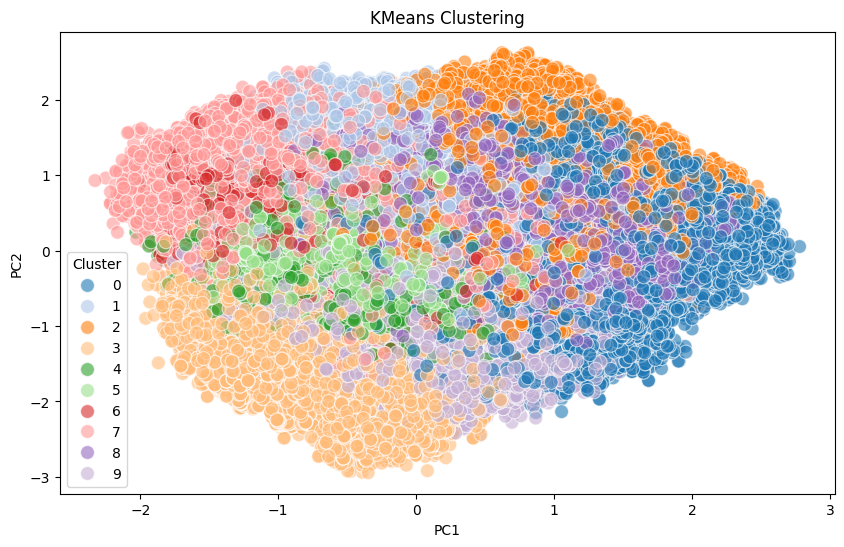

In [ ]:
k = 10


# [Apply KMeans clustering]
kmeans = KMeans(n_clusters=k, random_state=42)
articles_kmeans_df_scaled['Cluster_id_kmeans'] = kmeans.fit_predict(articles_kmeans_df_scaled)

# Print cluster centers and labels
# print(f"Cluster Centers: {kmeans.cluster_centers_}\n")
# print(f"Cluster Labels: {kmeans.labels_}")
display(articles_kmeans_df_scaled.head(10))

# [Visualization]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=articles_kmeans_df_scaled['PC1'],
    y=articles_kmeans_df_scaled['PC2'],
    hue=articles_kmeans_df_scaled['Cluster_id_kmeans'],
    # palette='viridis',
    palette='tab20',
    s=100,
    alpha=0.6
)
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
import plotly.express as px

articles_kmeans_df_scaled['Cluster_id_kmeans'] = articles_kmeans_df_scaled['Cluster_id_kmeans'].astype(str)

fig = px.scatter_3d(
    articles_kmeans_df_scaled,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster_id_kmeans',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    category_orders={"Cluster_id_kmeans": [str(i) for i in range(10)]},
    title='KMeans Clustering - 3D',
    opacity=0.4
)

fig.update_layout(legend_title_text='Cluster')
fig.update_traces(marker=dict(size=5))
fig.show()


## DBSCAN - Articles

[-1 -1 -1 ... -1  3 -1]


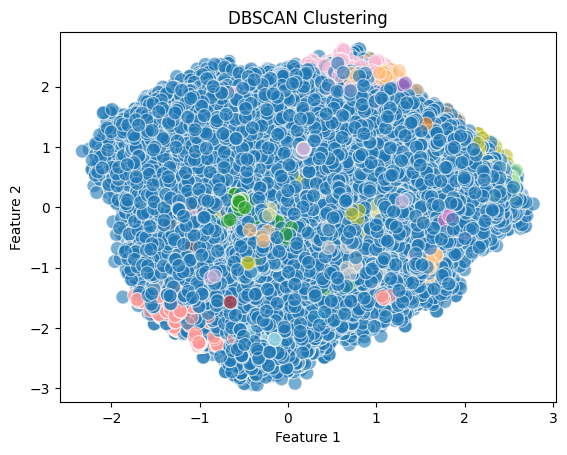

In [ ]:
k = 10

from sklearn import metrics
from sklearn.cluster import DBSCAN, OPTICS

# articles_kmeans_df_scaled.head()
# print(articles_kmeans_df_scaled.head())
clusters = DBSCAN(min_samples=50, eps=0.5).fit_predict(articles_kmeans_df_scaled)
print(clusters)
sns.scatterplot(
    x=articles_kmeans_df_scaled['PC1'],
    y=articles_kmeans_df_scaled['PC2'],
    hue=clusters,
    # palette='viridis',
    palette='tab20',
    s=100,
    alpha=0.6
)

# plt.scatter(articles_kmeans_df_scaled.iloc[:, 0], articles_kmeans_df_scaled.iloc[:, 2], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.legend([],[], frameon=False)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## KMeans - Customer


### t-SNE + KMeans

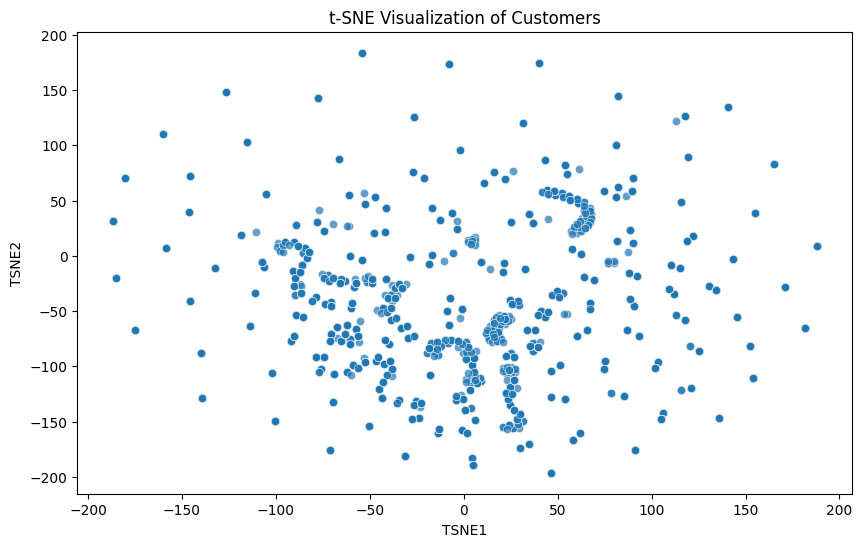

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

customers_for_pca = customers.drop(columns=['customer_id'])
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers_for_pca)


tsne = TSNE(n_components=2, random_state=42, perplexity=30)

###
sample_size = 10000
test = customers_scaled[:sample_size]
customers_tsne = tsne.fit_transform(test)
# customers_tsne = tsne.fit_transform(customers_scaled)
###


customers_tsne_df = pd.DataFrame(customers_tsne, columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    data=customers_tsne_df,
    alpha=0.7
)
plt.title('t-SNE Visualization of Customers')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


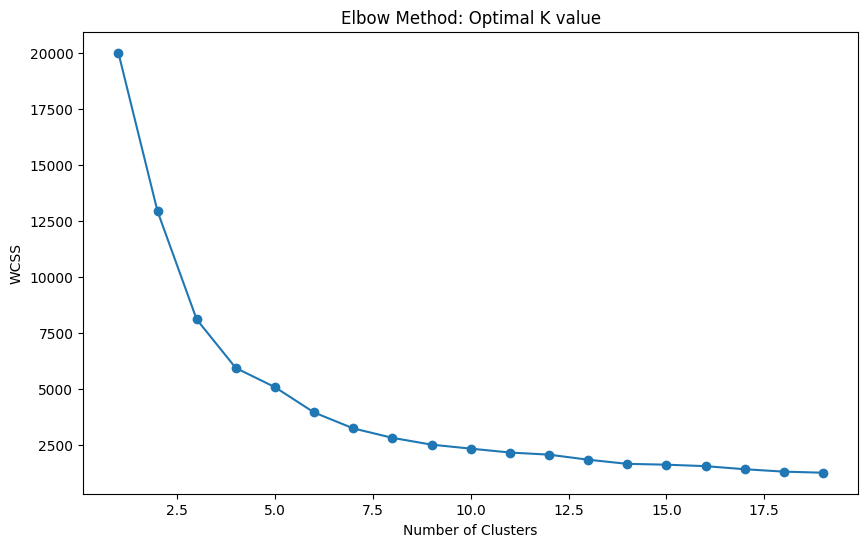

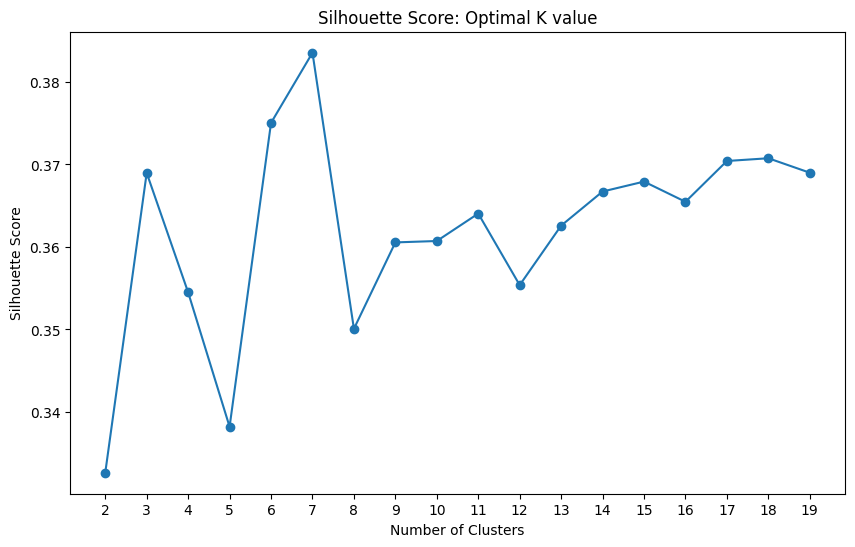

Optimal K(Elbow & Silhouette): 7


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# [***]Standardize the PCA-transformed data
scaler = StandardScaler()
customers_tsne_df_scaled = scaler.fit_transform(customers_tsne_df)
customers_tsne_df_scaled = pd.DataFrame(customers_tsne_df_scaled, columns=customers_tsne_df.columns)

# [Elbow method] to determine K value
lim_k_test = 20
wcss = []
for i in range(1, lim_k_test):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customers_tsne_df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, lim_k_test), wcss, marker='o')
plt.title('Elbow Method: Optimal K value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# [Silhouette method] to determine K value
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


sample_size = 10000
sampled_data = customers_tsne_df_scaled.sample(n=sample_size, random_state=42)

sil_scores = []
range_n_clusters = range(2, lim_k_test)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_data)
    silhouette_avg = silhouette_score(sampled_data, cluster_labels)
    sil_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score: Optimal K value')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))
plt.ylabel('Silhouette Score')
plt.show()


print(f"Optimal K(Elbow & Silhouette): 7")


TSNE1     TSNE2  Cluster_id_kmeans
0 -1.952658 -0.267800                  4
1  0.229682 -0.119824                  2
2 -0.092369 -0.584419                  2
3 -0.330581 -1.982660                  1
4  0.638424 -0.825530                  1
5 -0.604133 -0.759422                  6
6  0.871117  1.488233                  5
7  1.538382 -0.639141                  3
8  0.871117  1.488233                  5
9  0.871117  1.488233                  5

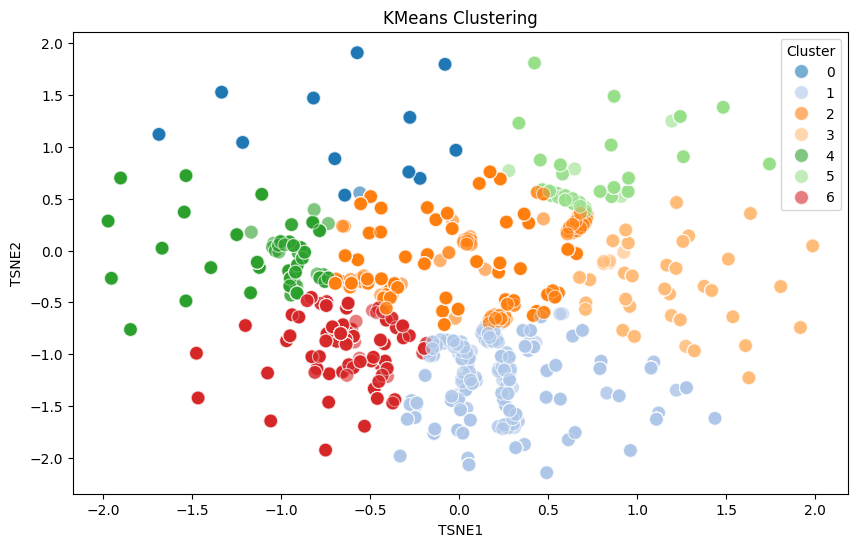

In [ ]:
k = 7

# [Apply KMeans clustering]
kmeans = KMeans(n_clusters=k, random_state=42)
customers_tsne_df_scaled['Cluster_id_kmeans'] = kmeans.fit_predict(customers_tsne_df_scaled)

# Print cluster centers and labels
# print(f"Cluster Centers: {kmeans.cluster_centers_}\n")
# print(f"Cluster Labels: {kmeans.labels_}")
display(customers_tsne_df_scaled.head(10))

# [Visualization]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customers_tsne_df_scaled['TSNE1'],
    y=customers_tsne_df_scaled['TSNE2'],
    hue=customers_tsne_df_scaled['Cluster_id_kmeans'],
    # palette='viridis',
    palette='tab20',
    s=100,
    alpha=0.6
)
plt.title('KMeans Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.show()

## PCA + KMeans

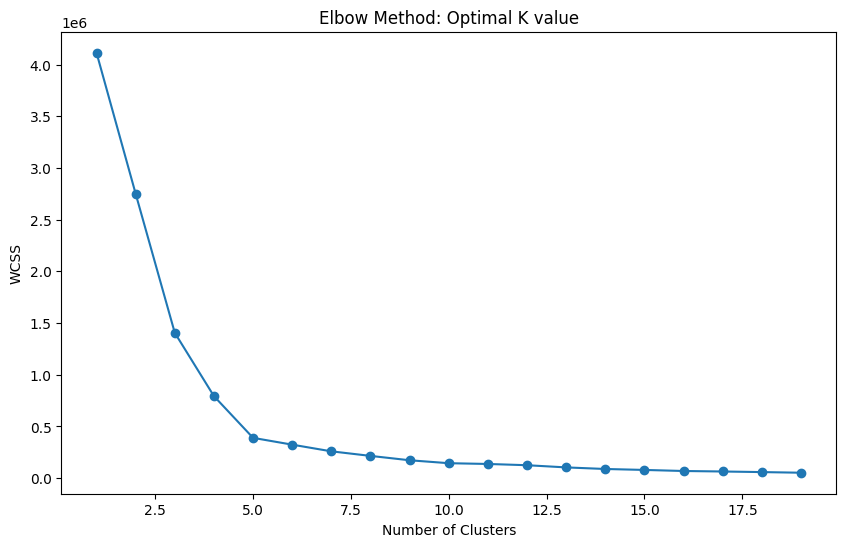

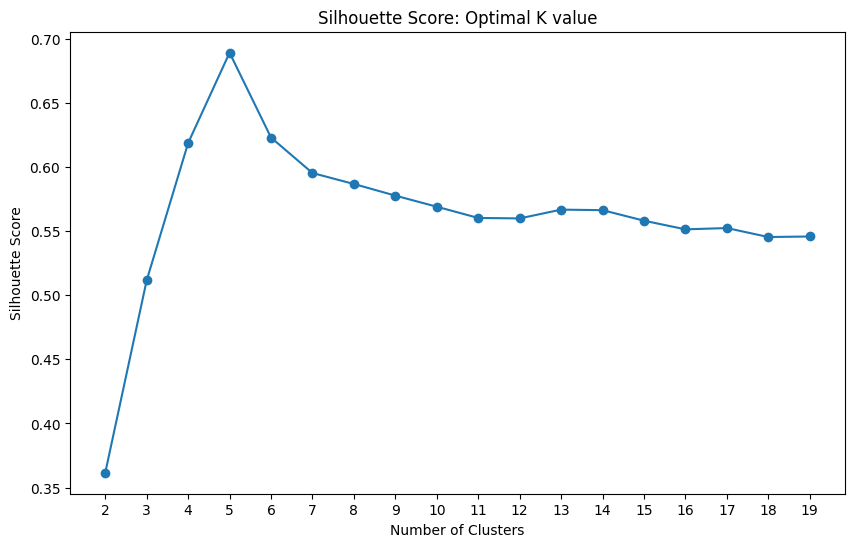

Optimal K(Elbow & Silhouette): 5


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

customers_kmeans_df = customers_pca_df.iloc[:, :3]

# [***]Standardize the PCA-transformed data
scaler = StandardScaler()
customers_kmeans_df_scaled = scaler.fit_transform(customers_kmeans_df)
customers_kmeans_df_scaled = pd.DataFrame(customers_kmeans_df_scaled, columns=customers_kmeans_df.columns)

# [Elbow method] to determine K value
lim_k_test = 20
wcss = []
for i in range(1, lim_k_test):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customers_kmeans_df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, lim_k_test), wcss, marker='o')
plt.title('Elbow Method: Optimal K value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# [Silhouette method] to determine K value
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


sample_size = 10000
sampled_data = customers_kmeans_df_scaled.sample(n=sample_size, random_state=42)

sil_scores = []
range_n_clusters = range(2, lim_k_test)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_data)
    silhouette_avg = silhouette_score(sampled_data, cluster_labels)
    sil_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score: Optimal K value')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))
plt.ylabel('Silhouette Score')
plt.show()


print(f"Optimal K(Elbow & Silhouette): 5")


PC1       PC2       PC3  Cluster_id_kmeans
0 -0.585801  0.495850  1.006934                  3
1 -0.597150  0.657552 -0.677025                  0
2 -0.597623  0.664290 -0.747190                  0
3 -0.583437  0.462162  1.357759                  3
4  1.354629 -0.427502  1.011806                  4
5 -1.652653 -3.110128 -0.840150                  2
6 -0.599514  0.691240 -1.027850                  0
7  1.345172 -0.292750 -0.391494                  1
8 -0.599514  0.691240 -1.027850                  0
9 -0.599514  0.691240 -1.027850                  0

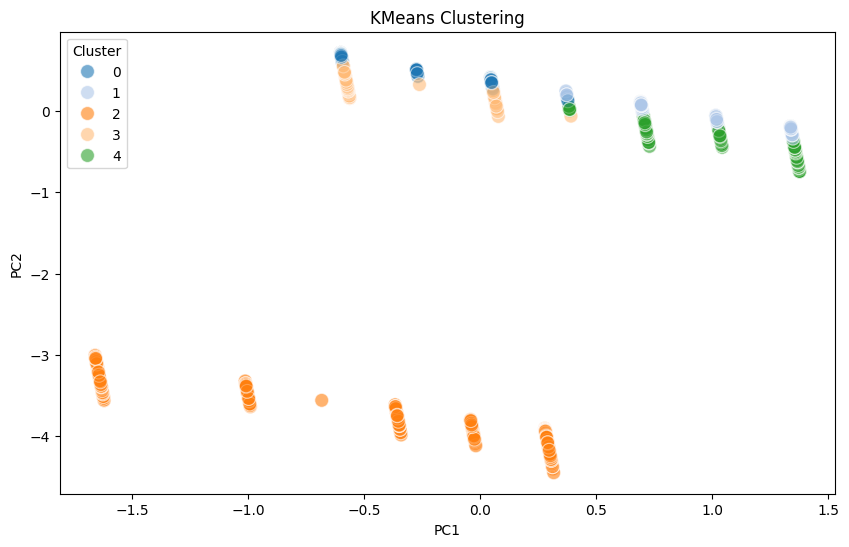

In [ ]:
k = 5

# [Apply KMeans clustering]
kmeans = KMeans(n_clusters=k, random_state=42)
customers_kmeans_df_scaled['Cluster_id_kmeans'] = kmeans.fit_predict(customers_kmeans_df_scaled)

# Print cluster centers and labels
# print(f"Cluster Centers: {kmeans.cluster_centers_}\n")
# print(f"Cluster Labels: {kmeans.labels_}")
display(customers_kmeans_df_scaled.head(10))

# [Visualization]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customers_kmeans_df_scaled['PC1'],
    y=customers_kmeans_df_scaled['PC2'],
    hue=customers_kmeans_df_scaled['Cluster_id_kmeans'],
    # palette='viridis',
    palette='tab20',
    s=100,
    alpha=0.6
)
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

## DBSCAN  - Customers

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


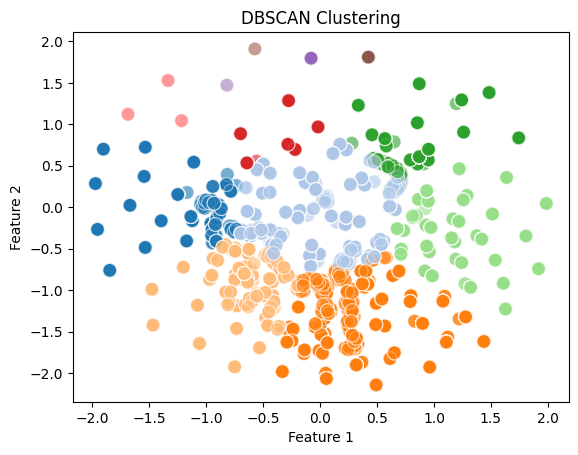

In [ ]:
from sklearn import metrics
from sklearn.cluster import DBSCAN, OPTICS

clusters = DBSCAN(min_samples=50, eps=0.5).fit_predict(customers_tsne_df_scaled)
print(set(clusters))
sns.scatterplot(
    x=customers_tsne_df_scaled['TSNE1'],
    y=customers_tsne_df_scaled['TSNE2'],
    hue=clusters,
    # palette='viridis',
    palette='tab20',
    s=100,
    alpha=0.6
)

# plt.scatter(articles_kmeans_df_scaled.iloc[:, 0], articles_kmeans_df_scaled.iloc[:, 2], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.legend([],[], frameon=False)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
articles = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/articles_pca_clustered.csv')
customers = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/customers_pca_clustered.csv')
transactions = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_cleaned.csv')

In [ ]:
range1_start = '2020-09-16'
range1_end = '2020-09-22'

range2_start = '2020-09-09'
range2_end = '2020-09-15'

range3_start = '2019-03-01'
range3_end = '2020-09-08'

Spliting the transaction data into train, validation and test. Test contains last one week. Validation before one week and everything else into train

In [ ]:
df_range1 = transactions[(transactions['t_dat'] >= range1_start) & (transactions['t_dat'] <= range1_end)]
df_range2 = transactions[(transactions['t_dat'] >= range2_start) & (transactions['t_dat'] <= range2_end)]
df_range3 = transactions[(transactions['t_dat'] >= range3_start) & (transactions['t_dat'] <= range3_end)]

In [ ]:
df_range1.to_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_test.csv')
df_range2.to_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_validation.csv')
df_range3.to_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_train.csv')

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

def customer_hex_id_to_int(series):
    return series.str[-16:].apply(hex_id_to_int)

def hex_id_to_int(str):
    return int(str[-16:], 16)

def article_id_str_to_int(series):
    return series.astype('int32')

def article_id_int_to_str(series):
    return '0' + series.astype('str')

class Categorize(BaseEstimator, TransformerMixin):
    def __init__(self, min_examples=0):
        self.min_examples = min_examples
        self.categories = []

    def fit(self, X):
        for i in range(X.shape[1]):
            vc = X.iloc[:, i].value_counts()
            self.categories.append(vc[vc > self.min_examples].index.tolist())
        return self

    def transform(self, X):
        data = {X.columns[i]: pd.Categorical(X.iloc[:, i], categories=self.categories[i]).codes for i in range(X.shape[1])}
        return pd.DataFrame(data=data)

In [4]:
import pandas as pd
import numpy as np
transactions = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/transactions_cleaned.csv')
customers = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/customers.csv')
articles = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/articles.csv')

In [5]:
transactions['customer_id'] = customer_hex_id_to_int(transactions['customer_id'])
transactions.t_dat = pd.to_datetime(transactions.t_dat, format='%Y-%m-%d')
transactions['week'] = 104 - (transactions.t_dat.max() - transactions.t_dat).dt.days // 7

In [6]:
transactions.article_id = article_id_str_to_int(transactions.article_id)
articles.article_id = article_id_str_to_int(articles.article_id)

transactions.week = transactions.week.astype('int8')
transactions.sales_channel_id = transactions.sales_channel_id.astype('int8')
transactions.price = transactions.price.astype('float32')

In [8]:
transactions.drop(columns='t_dat').info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24961179 entries, 0 to 24961178
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   customer_id       uint64 
 2   article_id        int32  
 3   price             float32
 4   sales_channel_id  int8   
 5   week              int8   
dtypes: float32(1), int32(1), int64(1), int8(2), uint64(1)
memory usage: 618.9 MB


In [9]:
customers.customer_id = customer_hex_id_to_int(customers.customer_id)
for col in ['FN', 'Active', 'age']:
    customers[col].fillna(-1, inplace=True)
    customers[col] = customers[col].astype('int8')

<ipython-input-9-da4cede0a5ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers[col].fillna(-1, inplace=True)
<ipython-input-9-da4cede0a5ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [10]:
customers.club_member_status = Categorize().fit_transform(customers[['club_member_status']]).club_member_status
customers.postal_code = Categorize().fit_transform(customers[['postal_code']]).postal_code
customers.fashion_news_frequency = Categorize().fit_transform(customers[['fashion_news_frequency']]).fashion_news_frequency

In [11]:
for col in articles.columns:
    if articles[col].dtype == 'object':
        articles[col] = Categorize().fit_transform(articles[[col]])[col]

In [12]:
for col in articles.columns:
    if articles[col].dtype == 'int64':
        articles[col] = articles[col].astype('int32')

In [13]:
transactions.sort_values(['t_dat', 'customer_id'], inplace=True)

We found 6 weeks gives best results

In [14]:
test_week = transactions.week.max() + 1
transactions = transactions[transactions.week > transactions.week.max() - 6]

In [15]:
c2weeks = transactions.groupby('customer_id')['week'].unique()
transactions.groupby('week')['t_dat'].agg(['min', 'max'])

min        max
week                      
99   2020-08-12 2020-08-18
100  2020-08-19 2020-08-25
101  2020-08-26 2020-09-01
102  2020-09-02 2020-09-08
103  2020-09-09 2020-09-15
104  2020-09-16 2020-09-22

In [16]:
c2weeks2shifted_weeks = {}

for c_id, weeks in c2weeks.items():
    c2weeks2shifted_weeks[c_id] = {}
    for i in range(weeks.shape[0]-1):
        c2weeks2shifted_weeks[c_id][weeks[i]] = weeks[i+1]
    c2weeks2shifted_weeks[c_id][weeks[-1]] = test_week

In [17]:
candidates_last_purchase = transactions.copy()
weeks = []
for i, (c_id, week) in enumerate(zip(transactions['customer_id'], transactions['week'])):
    weeks.append(c2weeks2shifted_weeks[c_id][week])

candidates_last_purchase.week=weeks

In [18]:
mean_price = transactions \
    .groupby(['week', 'article_id'])['price'].mean()
sales = transactions \
    .groupby('week')['article_id'].value_counts() \
    .groupby('week').rank(method='dense', ascending=False) \
    .groupby('week').head(12).rename('bestseller_rank').astype('int8')

In [19]:
bestsellers_previous_week = pd.merge(sales, mean_price, on=['week', 'article_id']).reset_index()
bestsellers_previous_week.week += 1
unique_transactions = transactions \
    .groupby(['week', 'customer_id']) \
    .head(1) \
    .drop(columns=['article_id', 'price']) \
    .copy()
transactions.drop_duplicates(['week', 'customer_id'])

Unnamed: 0      t_dat           customer_id  article_id     price  \
23426224    30253369 2020-08-12       200292573348128   816563004  0.013542   
23461241    30288386 2020-08-12      1037449031262554   813094004  0.013542   
23410395    30237540 2020-08-12      2468546290291055   941005005  0.010831   
23438126    30265271 2020-08-12      4920151714340210   817834002  0.022017   
23417624    30244769 2020-08-12      5474139543167571   806388028  0.010831   
...              ...        ...                   ...         ...       ...   
24933043    31760188 2020-09-22  18435221511488011015   573085055  0.033881   
24955089    31782234 2020-09-22  18436859303155335645   801447001  0.030492   
24960106    31787251 2020-09-22  18437941771381362708   907188001  0.050831   
24948877    31776022 2020-09-22  18438270306572912089   751471043  0.033881   
24951952    31779097 2020-09-22  18440902715633436014   918894002  0.016932   

          sales_channel_id  week  
23426224                 2    99  
23461241                 2    99  
23410395                 2    99  
23438126                 2    99  
23417624                 2    99  
...                    ...   ...  
24933043                 1   104  
24955089                 1   104  
24960106                 2   104  
24948877                 1   104  
24951952                 1   104  

[440207 rows x 7 columns]

In [20]:
candidates_bestsellers = pd.merge(
    unique_transactions,
    bestsellers_previous_week,
    on='week',
)

In [21]:
test_set_transactions = unique_transactions.drop_duplicates('customer_id').reset_index(drop=True)
test_set_transactions.week = test_week

In [23]:
candidates_bestsellers_test_week = pd.merge(
    test_set_transactions,
    bestsellers_previous_week,
    on='week'
)
candidates_bestsellers = pd.concat([candidates_bestsellers, candidates_bestsellers_test_week])
candidates_bestsellers.drop(columns='bestseller_rank', inplace=True)
transactions['purchased'] = 1

In [24]:
data = pd.concat([transactions, candidates_last_purchase, candidates_bestsellers])
data.purchased.fillna(0, inplace=True)

<ipython-input-24-af3c2b42d021>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.purchased.fillna(0, inplace=True)


In [25]:
data.drop_duplicates(['customer_id', 'article_id', 'week'], inplace=True)
data = pd.merge(
    data,
    bestsellers_previous_week[['week', 'article_id', 'bestseller_rank']],
    on=['week', 'article_id'],
    how='left'
)
data = data[data.week != data.week.min()]
data.bestseller_rank.fillna(999, inplace=True)
data = pd.merge(data, articles, on='article_id', how='left')
data = pd.merge(data, customers, on='customer_id', how='left')

<ipython-input-25-a6c10837f672>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.bestseller_rank.fillna(999, inplace=True)
<ipython-input-25-a6c10837f672>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bestseller_rank.fillna(999, inplace=True)


In [26]:
data.head(5)

Unnamed: 0      t_dat       customer_id  article_id     price  \
0    30500174 2020-08-19  6435666514878045   816423005  0.011847   
1    30500175 2020-08-19  6435666514878045   599718043  0.016932   
2    30500176 2020-08-19  6435666514878045   806528004  0.025407   
3    30500177 2020-08-19  6435666514878045   903211001  0.042356   
4    30500178 2020-08-19  6435666514878045   779781006  0.042356   

   sales_channel_id  week  purchased  bestseller_rank  product_code  ...  \
0                 2   100        1.0            999.0        816423  ...   
1                 2   100        1.0            999.0        599718  ...   
2                 2   100        1.0            999.0        806528  ...   
3                 2   100        1.0            999.0        903211  ...   
4                 2   100        1.0            999.0        779781  ...   

   section_name  garment_group_no  garment_group_name  detail_desc  FN  \
0             1              1025                  16         1198  -1   
1            10              1025                  16          416  -1   
2             7              1009                   5         2375  -1   
3             7              1009                   5        41477  -1   
4             7              1009                   5          860  -1   

   Active  club_member_status  fashion_news_frequency  age  postal_code  
0      -1                   0                       0   27         8931  
1      -1                   0                       0   27         8931  
2      -1                   0                       0   27         8931  
3      -1                   0                       0   27         8931  
4      -1                   0                       0   27         8931  

[5 rows x 39 columns]

In [27]:
data.sort_values(['week', 'customer_id'], ignore_index=True, inplace=True)

In [29]:
data.to_parquet('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/lgbmknndata.parquet')